In [33]:
import numpy as np
from sklearn.metrics import pairwise_distances


class DBSCAN:
    def __init__(self, eps=0.5, min_pts=5):
        self.eps = eps
        self.min_pts = min_pts
        
    def fit_predict(self, X):
        self.clusters = np.full(X.shape[0], -1)
        distances = pairwise_distances(X)
        self.neighbor_mtrx = distances<self.eps
        self.neighbor_counter = self.neighbor_mtrx.sum(axis=0)
        
        cluster_id = 0
        for i in range(len(X)):
            if self.neighbor_counter[i]>self.min_pts and self.clusters[i]==-1:
                self.clusters[i]=cluster_id
                self.build_cluster(i, cluster_id)
                cluster_id += 1
                    
        return self.clusters
    
    def build_cluster(self, idx, cluster_id):
        for neighbor in np.where(self.neighbor_mtrx[idx])[0]:
            if self.clusters[neighbor]==-1:
                self.clusters[neighbor]=cluster_id
                if self.neighbor_counter[neighbor]>self.min_pts:
                    self.build_cluster(neighbor, cluster_id)

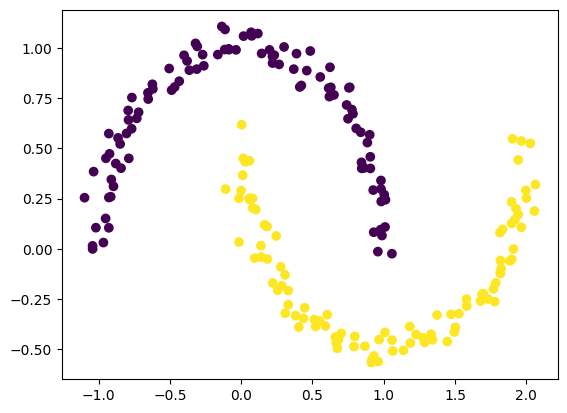

In [34]:
# generate sample data
from sklearn.datasets import make_moons
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

# run DBSCAN
dbscan = DBSCAN(eps=0.3, min_pts=10)
labels = dbscan.fit_predict(X)

# visualize clusters
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.show()